# Reglas de asociación

## Ejercicio 2. 

Vamos a considerar de nuevo los datos del Titanic, pero esta vez únicamente una versión recortada que involucra únicamente a las siguientes cuatro variables categóricas: Class, Sex, Age y Survived.

Lo primero que haremos será cargar los paquetes que vamos a necesitar en este ejercicio. Aparte de los paquetes típicos (matplotlib, numpy o pandas) cargaremos el paquete **mlxtend**, que es el que implementa el algoritmo _apriori_.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
titanic = pd.read_csv('titanic.csv', index_col=0)

In [3]:
titanic

Class     Sex    Age Survived
1      3rd    Male  Child       No
2      3rd    Male  Child       No
3      3rd    Male  Child       No
4      3rd    Male  Child       No
5      3rd    Male  Child       No
...    ...     ...    ...      ...
2197  Crew  Female  Adult      Yes
2198  Crew  Female  Adult      Yes
2199  Crew  Female  Adult      Yes
2200  Crew  Female  Adult      Yes
2201  Crew  Female  Adult      Yes

[2201 rows x 4 columns]

In [4]:
titanic_onehot = pd.get_dummies(titanic)

In [5]:
titanic

Class     Sex    Age Survived
1      3rd    Male  Child       No
2      3rd    Male  Child       No
3      3rd    Male  Child       No
4      3rd    Male  Child       No
5      3rd    Male  Child       No
...    ...     ...    ...      ...
2197  Crew  Female  Adult      Yes
2198  Crew  Female  Adult      Yes
2199  Crew  Female  Adult      Yes
2200  Crew  Female  Adult      Yes
2201  Crew  Female  Adult      Yes

[2201 rows x 4 columns]

In [6]:
titanic_onehot

Class_1st  Class_2nd  Class_3rd  Class_Crew  Sex_Female  Sex_Male  \
1             0          0          1           0           0         1   
2             0          0          1           0           0         1   
3             0          0          1           0           0         1   
4             0          0          1           0           0         1   
5             0          0          1           0           0         1   
...         ...        ...        ...         ...         ...       ...   
2197          0          0          0           1           1         0   
2198          0          0          0           1           1         0   
2199          0          0          0           1           1         0   
2200          0          0          0           1           1         0   
2201          0          0          0           1           1         0   

      Age_Adult  Age_Child  Survived_No  Survived_Yes  
1             0          1            1             0  
2             0          1            1             0  
3             0          1            1             0  
4             0          1            1             0  
5             0          1            1             0  
...         ...        ...          ...           ...  
2197          1          0            0             1  
2198          1          0            0             1  
2199          1          0            0             1  
2200          1          0            0             1  
2201          1          0            0             1  

[2201 rows x 10 columns]

En la implementación de mlxtend el proceso de generación de itemsets frecuentes y extracción de reglas está dividido en dos pasos, por lo que deberemos llevarlos a cabo de manera independiente. Al extraer los itemsets fijamos un soporte mínimo de 0.1 y especificamos que se usé el nombre de la columna como nombre del item (si no, utiliza índices numéricos). Posteriormente, generamos las reglas, especificando una confianza mínima de 0.8.

In [7]:
frequent_itemsets = apriori(titanic_onehot, min_support=0.1, use_colnames=True)

In [8]:
frequent_itemsets.sort_values("support", ascending = False)

support                                        itemsets
6   0.950477                                     (Age_Adult)
5   0.786461                                      (Sex_Male)
19  0.757383                           (Sex_Male, Age_Adult)
7   0.676965                                   (Survived_No)
22  0.653339                        (Survived_No, Age_Adult)
20  0.619718                         (Survived_No, Sex_Male)
31  0.603816              (Survived_No, Sex_Male, Age_Adult)
3   0.402090                                    (Class_Crew)
15  0.402090                         (Age_Adult, Class_Crew)
27  0.391640               (Sex_Male, Age_Adult, Class_Crew)
14  0.391640                          (Sex_Male, Class_Crew)
8   0.323035                                  (Survived_Yes)
2   0.320763                                     (Class_3rd)
16  0.305770                       (Survived_No, Class_Crew)
29  0.305770            (Survived_No, Age_Adult, Class_Crew)
28  0.304407             (Survived_No, Sex_Male, Class_Crew)
34  0.304407  (Survived_No, Sex_Male, Age_Adult, Class_Crew)
23  0.297138                       (Survived_Yes, Age_Adult)
12  0.284871                          (Class_3rd, Age_Adult)
13  0.239891                        (Survived_No, Class_3rd)
11  0.231713                           (Class_3rd, Sex_Male)
26  0.216265             (Age_Adult, Survived_No, Class_3rd)
4   0.213539                                    (Sex_Female)
24  0.209905                (Class_3rd, Sex_Male, Age_Adult)
17  0.193094                         (Sex_Female, Age_Adult)
25  0.191731              (Survived_No, Sex_Male, Class_3rd)
33  0.175829   (Age_Adult, Survived_No, Sex_Male, Class_3rd)
21  0.166742                        (Survived_Yes, Sex_Male)
18  0.156293                      (Survived_Yes, Sex_Female)
32  0.153567             (Survived_Yes, Sex_Male, Age_Adult)
0   0.147660                                     (Class_1st)
9   0.144934                          (Class_1st, Age_Adult)
30  0.143571           (Survived_Yes, Sex_Female, Age_Adult)
1   0.129487                                     (Class_2nd)
10  0.118582                          (Class_2nd, Age_Adult)

De aquí extraemos algunas conclusiones interesantes:
- El 95 % de los pasajeros son adultos.
- Más de un 78 % son hombres.
- El 75 % son hombres y adultos.
- Más del 67 % de los pasajeros no sobrevivió.
- El 65 % de los adultos no sobrevivió.
- A pesar de haber muchos mas hombres que mujeres, la mitad de los supervivientes fueron mujeres.

In [9]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

rules.sort_values("lift", ascending = False, inplace = True)
rules

antecedents            consequents  \
28             (Survived_No, Class_Crew)  (Sex_Male, Age_Adult)   
15                          (Class_Crew)  (Sex_Male, Age_Adult)   
27  (Survived_No, Age_Adult, Class_Crew)             (Sex_Male)   
16             (Survived_No, Class_Crew)             (Sex_Male)   
14               (Age_Adult, Class_Crew)             (Sex_Male)   
3                           (Class_Crew)             (Sex_Male)   
24      (Class_3rd, Sex_Male, Age_Adult)          (Survived_No)   
11                 (Class_3rd, Sex_Male)          (Survived_No)   
21                         (Survived_No)  (Sex_Male, Age_Adult)   
20              (Survived_No, Age_Adult)             (Sex_Male)   
7                          (Survived_No)             (Sex_Male)   
17             (Survived_No, Class_Crew)            (Age_Adult)   
26   (Survived_No, Sex_Male, Class_Crew)            (Age_Adult)   
13                (Sex_Male, Class_Crew)            (Age_Adult)   
4                           (Class_Crew)            (Age_Adult)   
23   (Class_3rd, Survived_No, Age_Adult)             (Sex_Male)   
0                            (Class_1st)            (Age_Adult)   
19               (Survived_No, Sex_Male)            (Age_Adult)   
8                          (Survived_No)            (Age_Adult)   
6                             (Sex_Male)            (Age_Adult)   
22              (Survived_Yes, Sex_Male)            (Age_Adult)   
9                         (Survived_Yes)            (Age_Adult)   
18            (Survived_Yes, Sex_Female)            (Age_Adult)   
25    (Survived_No, Sex_Male, Class_3rd)            (Age_Adult)   
1                            (Class_2nd)            (Age_Adult)   
10                 (Class_3rd, Sex_Male)            (Age_Adult)   
5                           (Sex_Female)            (Age_Adult)   
12              (Survived_No, Class_3rd)            (Age_Adult)   
2                            (Class_3rd)            (Age_Adult)   

    antecedent support  consequent support   support  confidence      lift  \
28            0.305770            0.757383  0.304407    0.995542  1.314450   
15            0.402090            0.757383  0.391640    0.974011  1.286022   
27            0.305770            0.786461  0.304407    0.995542  1.265851   
16            0.305770            0.786461  0.304407    0.995542  1.265851   
14            0.402090            0.786461  0.391640    0.974011  1.238474   
3             0.402090            0.786461  0.391640    0.974011  1.238474   
24            0.209905            0.676965  0.175829    0.837662  1.237379   
11            0.231713            0.676965  0.191731    0.827451  1.222295   
21            0.676965            0.757383  0.603816    0.891946  1.177669   
20            0.653339            0.786461  0.603816    0.924200  1.175139   
7             0.676965            0.786461  0.619718    0.915436  1.163995   
17            0.305770            0.950477  0.305770    1.000000  1.052103   
26            0.304407            0.950477  0.304407    1.000000  1.052103   
13            0.391640            0.950477  0.391640    1.000000  1.052103   
4             0.402090            0.950477  0.402090    1.000000  1.052103   
23            0.216265            0.786461  0.175829    0.813025  1.033777   
0             0.147660            0.950477  0.144934    0.981538  1.032680   
19            0.619718            0.950477  0.603816    0.974340  1.025106   
8             0.676965            0.950477  0.653339    0.965101  1.015386   
6             0.786461            0.950477  0.757383    0.963027  1.013204   
22            0.166742            0.950477  0.153567    0.920981  0.968967   
9             0.323035            0.950477  0.297138    0.919831  0.967757   
18            0.156293            0.950477  0.143571    0.918605  0.966467   
25            0.191731            0.950477  0.175829    0.917062  0.964844   
1             0.129487            0.950477  0.118582    0.915789  0.

Los tripulantes que no sobrevivieron tenían una alta probabilidad de ser hombres adultos.

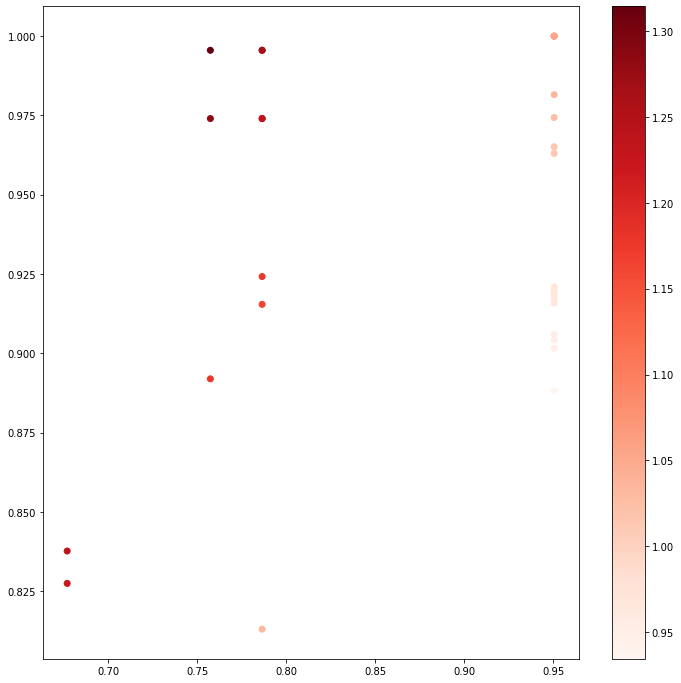

In [10]:
plt.figure(figsize=(12, 12))
cm = plt.cm.get_cmap('Reds')
sc = plt.scatter(rules["consequent support"], rules["confidence"], c=rules["lift"], cmap=cm)
plt.colorbar(sc)
plt.show()

In [11]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
                
            G1.add_nodes_from([a])
        
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
    for p in pos:  # raise text positions
           pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

In [12]:
rules[0:6]

antecedents            consequents  \
28             (Survived_No, Class_Crew)  (Sex_Male, Age_Adult)   
15                          (Class_Crew)  (Sex_Male, Age_Adult)   
27  (Survived_No, Age_Adult, Class_Crew)             (Sex_Male)   
16             (Survived_No, Class_Crew)             (Sex_Male)   
14               (Age_Adult, Class_Crew)             (Sex_Male)   
3                           (Class_Crew)             (Sex_Male)   

    antecedent support  consequent support   support  confidence      lift  \
28             0.30577            0.757383  0.304407    0.995542  1.314450   
15             0.40209            0.757383  0.391640    0.974011  1.286022   
27             0.30577            0.786461  0.304407    0.995542  1.265851   
16             0.30577            0.786461  0.304407    0.995542  1.265851   
14             0.40209            0.786461  0.391640    0.974011  1.238474   
3              0.40209            0.786461  0.391640    0.974011  1.238474   

    leverage  conviction  
28  0.072822   54.427079  
15  0.087104    9.335480  
27  0.063931   47.903983  
16  0.063931   47.903983  
14  0.075412    8.216621  
3   0.075412    8.216621

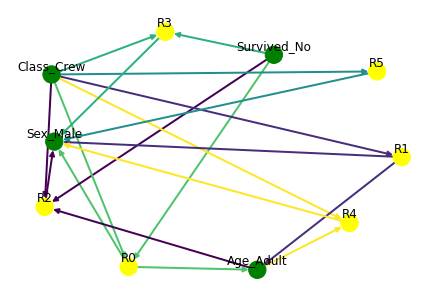

In [13]:
draw_graph(rules, 6)